# [DEV SCRIPT] Feedforward and feedback interactions for sequence learning in the macaque frontotemporal network

In [2]:
### Import toolboxes and dependencies -----------------------------------------------------#
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py

#------------------------------------------------------------------------------------------#

### Add root & subdirectories to path -----------------------------------------------------#
def init_path(root_dir):
    """
    Recursively add a directory and all its subdirectories to the system path.
    """
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if dirpath not in sys.path:
            sys.path.append(dirpath)
                  
          
if sys.platform == 'win32':  
    init_path(r'C:\KIKUCHI-LOCAL\script\2024-aglt-sequence')
elif sys.platform == 'darwin':
    init_path(r'/Users/stevenerrington/Desktop/Projects/2024-aglt-sequence')
    
    
#------------------------------------------------------------------------------------------#

### Import custom functions ---------------------- ----------------------------------------#
from setup_workspace import *
from matlab_functions import *
from nphys_functions import *
from figure_functions import *
from beh_functions import *

#------------------------------------------------------------------------------------------#

### Import experiment logs and define data directories ------------------------------------#
dirs = set_directories()                                    # Get directories
ephysLog, stimulusLog, spike_log = import_exp_map()         # Get experimental logs
ephysLog = clean_exp_map(ephysLog)                          # Clean experiment log
spike_log = clean_spike_map(spike_log)                      # Clean spike log
#------------------------------------------------------------------------------------------#


## Example neuron

In [3]:
# Define session
session_name = ephysLog['session'][41]

# Load event table data
full_path = os.path.join(dirs['py_data'], 'event_table', session_name + '-events.csv')
event_table = pd.read_csv(full_path)

# Amend event table with other relevant information
create_violation_alignment_event(event_table)

# Load example spike data
spike_dsp = 'DSP16a'
spike_times = np.loadtxt(os.path.join(dirs["py_data"], 'spike_times', session_name + '-' + spike_dsp + '-spk.txt'), delimiter=',')
spike_times = spike_times.astype(int)
sdf = spk_convolve(spike_times, np.max(spike_times)+10000, 'Gauss')

# Produced aligned SDF and spike times (raster)
time_win = np.arange(-1000, 5000);

align_event = 'trialStart_ms'
align_times = event_table[align_event].to_numpy(dtype=int)
sdf_aligned_trialStart, raster_aligned_trialStart = spk_align(sdf, spike_times, align_times, time_win)

align_event = 'stimulusOnset_ms'
align_times = event_table[align_event].to_numpy(dtype=int)
sdf_aligned_seqviol, raster_aligned_seqviol = spk_align(sdf, spike_times, align_times, time_win)

align_event = 'violation_ms'
align_times = event_table[align_event].to_numpy(dtype=int)
sdf_aligned_soundviol, raster_aligned_soundviol = spk_align(sdf, spike_times, align_times, time_win)

align_event = 'rewardOnset_ms'
align_times = event_table[align_event].to_numpy(dtype=int)
sdf_aligned_reward, raster_aligned_reward = spk_align(sdf, spike_times, align_times, time_win)

# Find violation and nonviolation trials
viol_trial_idx = event_table.index[event_table['cond_label'] == 'viol'].tolist()
nonviol_trial_idx = event_table.index[event_table['cond_label'] == 'nonviol'].tolist()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/stevenerrington/Library/CloudStorage/OneDrive-NewcastleUniversity/Research/agl_t/py/event_table/walt-agl_t-2020-09-21a-events.csv'

C:\KIKUCHI-LOCAL\script\2024-aglt-sequence\analysis\python\setup\figure_functions.py:13: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(array, axis=0)
C:\KIKUCHI-LOCAL\script\2024-aglt-sequence\analysis\python\setup\figure_functions.py:15: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  sem_plus = mean + scipy.stats.sem(array, axis=0, nan_policy = 'omit')
C:\KIKUCHI-LOCAL\script\2024-aglt-sequence\analysis\python\setup\figure_functions.py:16: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  sem_minus = mean - scipy.stats.sem(array, axis=0, nan_policy = 'omit')


(-200.0, 600.0)

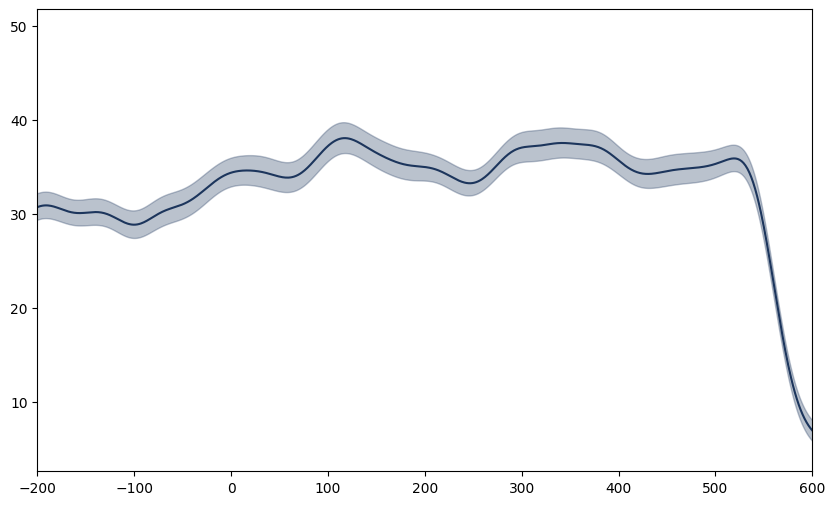

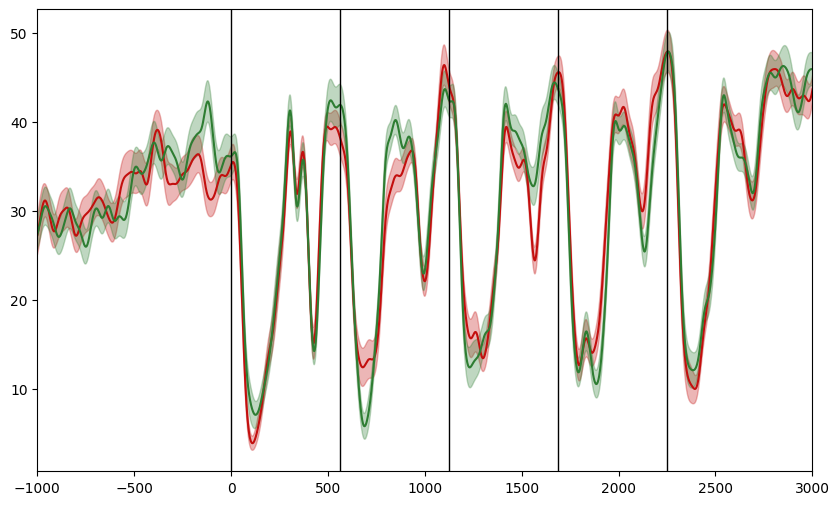

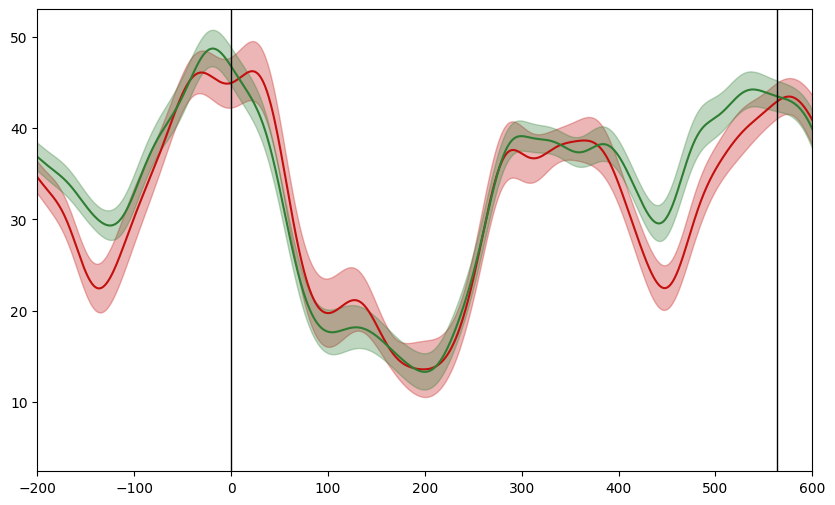

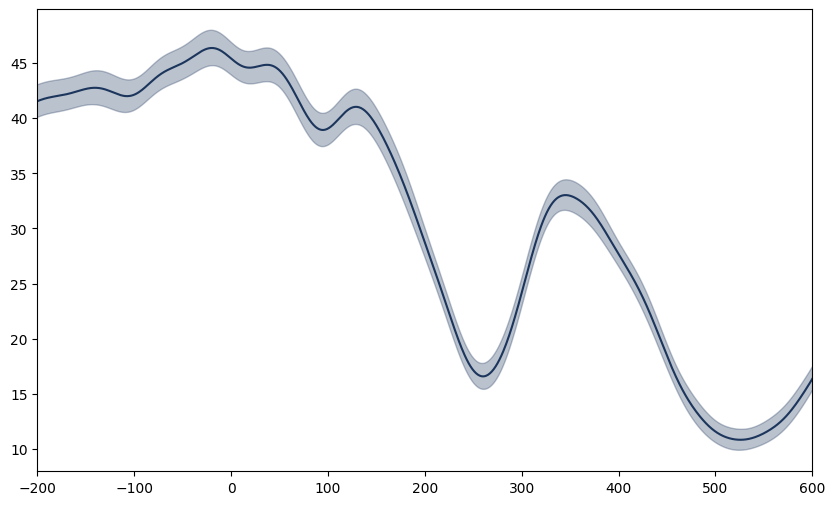

In [13]:
color_list = set_colors()
onset_times = [0, 563, 1126, 1689, 2252]

# Plot trial start activity
plt.figure(figsize=(10, 6))
plt_mean_sem(time_win, sdf_aligned_trialStart, '#1c355c')
plt.xlim(-200, 600) 

# Plot sequence onset aligned violation x non-violation activity
plt.figure(figsize=(10, 6))
plt_mean_sem(time_win, sdf_aligned_seqviol[viol_trial_idx,:], color_list.get('violation'))
plt_mean_sem(time_win, sdf_aligned_seqviol[nonviol_trial_idx,:], color_list.get('nonviolation'))
plt.xlim(-1000, 3000) 
for x in onset_times:
    plt.axvline(x, color='black', linestyle='solid', linewidth=1)
    
# Plot sound aligned violation x non-violation activity
plt.figure(figsize=(10, 6))
plt_mean_sem(time_win, sdf_aligned_soundviol[viol_trial_idx,:], color_list.get('violation'))
plt_mean_sem(time_win, sdf_aligned_soundviol[nonviol_trial_idx,:], color_list.get('nonviolation'))
for x in onset_times:
    plt.axvline(x, color='black', linestyle='solid', linewidth=1)
plt.xlim(-200, 600) 

# Plot reward activity
plt.figure(figsize=(10, 6))
plt_mean_sem(time_win, sdf_aligned_reward, '#1c355c')
plt.xlim(-200, 600) 


## Example load scripts

### Event table

In [ ]:
session_name = ephysLog['session'][20]
full_path = os.path.join(dirs['py_data'], 'event_table', session_name + '-events.csv')
event_table = pd.read_csv(full_path)

### Spike density functions

In [ ]:
session_spikes = spike_log['unitDSP'][spike_log['session'] == session_name]

sdf_aligned_dict = {}

for spike_dsp in session_spikes:
    spike_times = np.loadtxt(os.path.join(dirs["py_data"], 'spike_times', session_name + '-' + spike_dsp + '-spk.txt'), delimiter=',')
    spike_times = spike_times.astype(int)

    sdf = spk_convolve(spike_times, np.max(spike_times)+10000, 'Gauss')

    align_times = event_table['stimulusOnset_ms']
    align_times = align_times.to_numpy()
    align_times = align_times.astype(int)
    time_win = np.arange(-1000, 6000);

    sdf_aligned, raster_aligned = spk_align(sdf, spike_times, align_times, time_win)
    sdf_aligned_dict[spike_dsp] = sdf_aligned

In [ ]:
zsdf_aligned_seqviol = zscore_sdf(sdf_aligned_seqviol, (800,1000))
# This function still requires work - may not deal well with zeros

## Example plotting scripts

### Violation x nonviolation

In [ ]:
unique_cond_values = event_table['cond_value'].unique()

for spike_dsp in session_spikes:
    viol_trial_idx = event_table.index[event_table['cond_label'] == 'viol'].tolist()
    nonviol_trial_idx = event_table.index[event_table['cond_label'] == 'nonviol'].tolist()
    testa = np.nanmean(sdf_aligned_dict[spike_dsp][viol_trial_idx,:], axis=0)
    testb = np.nanmean(sdf_aligned_dict[spike_dsp][nonviol_trial_idx,:], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(time_win, testa, linestyle='-')
    plt.plot(time_win, testb, linestyle='-')

### Smoothed average activity

In [ ]:
for spike_dsp in session_spikes:
    
    mean_data = np.nanmean(sdf_aligned_dict[spike_dsp], axis=0)
    
    # Smoothing using a moving average with a window size of 3
    window_size = 200
    window = np.ones(window_size) / window_size
    mean_data_smoothed = np.convolve(mean_data, window, mode='same')
        
    # Plot the mean
    plt.figure(figsize=(10, 6))
    plt.plot(time_win, mean_data_smoothed, linestyle='-', color='k')
    plt.xlabel('Time from stimulus onset (ms)')
    plt.ylabel('Firing rate')
    plt.show()        


In [ ]:
spike_dsp = session_spikes.values[1]

spike_times = np.loadtxt(os.path.join(dirs["py_data"], 'spike_times', session_name + '-' + spike_dsp + '-spk.txt'), delimiter=',')
spike_times = spike_times.astype(int)

sdf = spk_convolve(spike_times, np.max(spike_times)+10000, 'Gauss')

align_times = event_table['stimulusOnset_ms']
align_times = align_times.to_numpy()
align_times = align_times.astype(int)
time_win = np.arange(-1000, 6000);
sdf_aligned, raster_aligned = spk_align(sdf, spike_times, align_times, time_win)

mean_data = np.nanmean(sdf_aligned, axis=0)
# Plot the mean
plt.figure(figsize=(10, 6))
plt.plot(time_win, mean_data, linestyle='-', color='w')
plt.xlabel('Time from stimulus onset (ms)')
plt.ylabel('Firing rate')
plt.show()

## Violation analysis

In [ ]:
def create_violation_alignment_event(event_table):
    # Ensure the DataFrame has the necessary columns
    if 'violation_ms' not in event_table.columns:
        event_table['violation_ms'] = np.nan

    for trial_i in range(len(event_table)):
        cond_value = event_table.at[trial_i, 'cond_value']
        stimulus_onset = event_table.at[trial_i, 'stimulusOnset_ms']

        if cond_value in {3, 7, 14, 1, 5, 13}:
            event_table.at[trial_i, 'violation_ms'] = stimulus_onset + 1127
        elif cond_value in {4, 8, 15, 2, 6, 16}:
            event_table.at[trial_i, 'violation_ms'] = stimulus_onset + 2253
        elif cond_value in {9, 10, 11, 12}:
            event_table.at[trial_i, 'violation_ms'] = np.nan

    return event_table


event_table = create_violation_alignment_event(event_table)


## Sound alignment


In [ ]:
spike_dsp = session_spikes.values[1]
spike_times = np.loadtxt(os.path.join(dirs["py_data"], 'spike_times', session_name + '-' + spike_dsp + '-spk.txt'), delimiter=',')
spike_times = spike_times.astype(int)
sdf = spk_convolve(spike_times, np.max(spike_times)+10000, 'Gauss')
sdf_aligned, raster_aligned = spk_align(sdf, spike_times, align_times, time_win)
get_sound_aligned_sdf(sdf_aligned, raster_aligned, stimulusLog, event_table)